# Panorama Stitcher

## Import packages

In [145]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## BGR to RGB converter

In [146]:
def convert_image(img):
    # enables mayplotlib to plot OpenCV images,
    # converts image from BGR to RGB
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return new_img

## Import images and resize

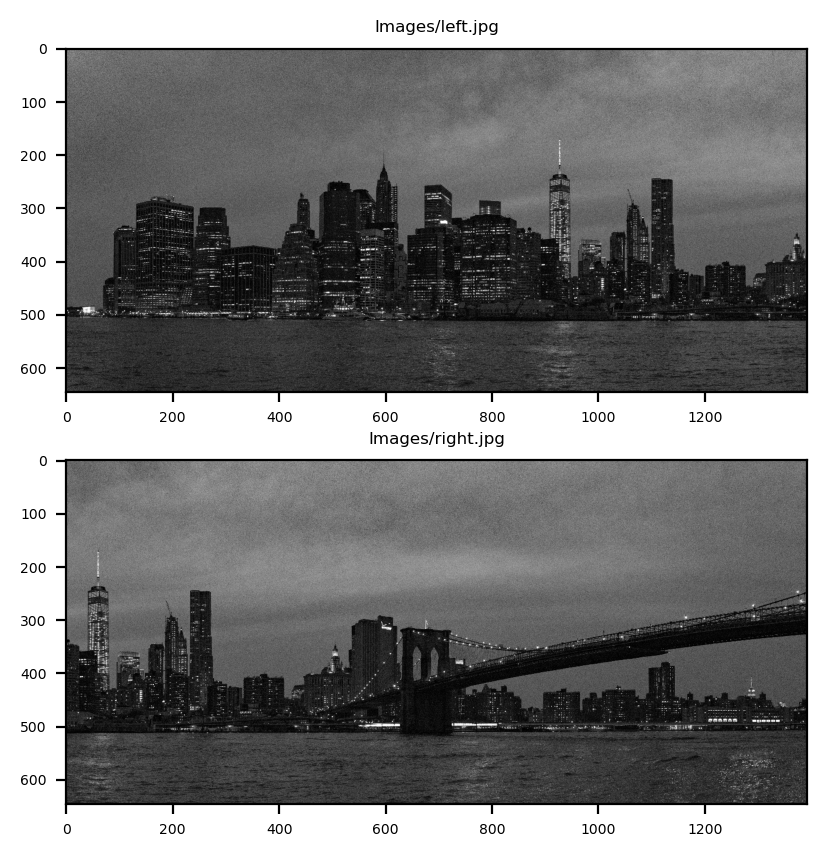

In [147]:
# import images, resize x0.5, convert to greyscale
img_ = cv2.imread("Images/left.jpg")
img_ = cv2.resize(img_, (0,0), None, 0.2, 0.2)
img1 = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)

img = cv2.imread("Images/right.jpg")
img = cv2.resize(img, (0,0), None, 0.2, 0.2)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# display image
plt.rc('font', size=5)
fig, ax = plt.subplots(2, 1, figsize=(5, 5), dpi=200)
ax[0].title.set_text("Images/left.jpg")
ax[1].title.set_text("Images/right.jpg")
ax[0].imshow(convert_image(img1))
ax[1].imshow(convert_image(img2))
plt.show()

## Find keypoints

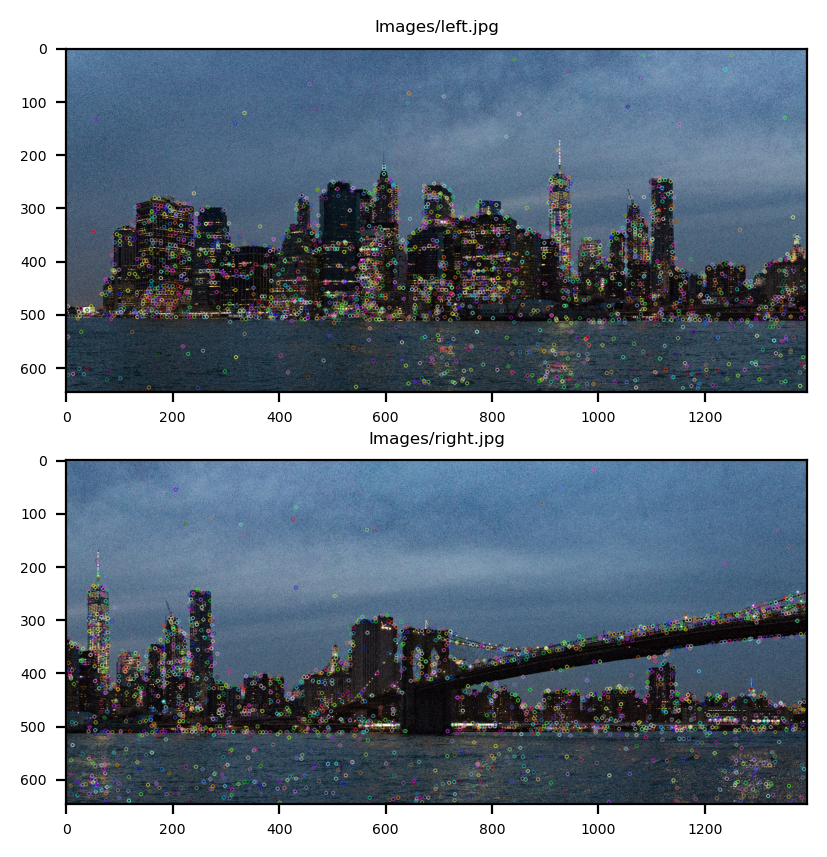

In [148]:
# set SIFT descriptor
descriptor = cv2.xfeatures2d.SIFT_create()

# get keypoints
(kps1, features1) = descriptor.detectAndCompute(img1, None)
(kps2, features2) = descriptor.detectAndCompute(img2, None)

# draw keypoints on images
k_img1 = cv2.drawKeypoints(img_, kps1, None)
k_img2 = cv2.drawKeypoints(img, kps2, None)

# display images
plt.rc('font', size=5)
fig, ax = plt.subplots(2, 1, figsize=(5, 5), dpi=200)
ax[0].title.set_text("Images/left.jpg")
ax[1].title.set_text("Images/right.jpg")
ax[0].imshow(convert_image(k_img1))
ax[1].imshow(convert_image(k_img2))
plt.show()